# ST4 MDS : TD 6 Temporal Series Forecasting

![CentraleSupelec Logo](https://www.centralesupelec.fr/sites/all/themes/cs_theme/medias/common/images/intro/logo_nouveau.jpg)

## AIMS of the TD : 
* 1. Fit a GARCH(1,1) and plot the predicted conditional variance till convergence. Can you obtain the
convergence value from the parameter of the regression. 
* 2. Simulates with a Monte-Carlo 1000 realizzations and plot the expected value the confidence intervals and the
realized out-of-sample for all the lags.
* 3. With a sliding window of 5 days verify that the coverage of the Monte-Carlo confidence is respected for all the
lags. Plot the average L1 deviation between the model expectation and the realizzation. 
* 4. Do the same of point 3 with an ARCH(5), and compare the results.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from arch import arch_model
import powerlaw as pw 
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd 
import scipy
import itertools

In [2]:
__author__ = "Colleville Tanguy"
__version__ = "1.0.0"
__maintainer__ = "Colleville Tanguy"
__email__ = "tanguy.colleville@student-cs.fr"
__status__ = "Dev"

## Loading Data and sampling

In [3]:
df=pd.read_csv(r"D:\CS_1A\ST4\Données statistiques en finance\TDs\TD 6\long_series_logret.csv",index_col=0)

In [4]:
df.index = pd.DatetimeIndex(df.index)

In [5]:
df.isna().sum() ## pour savoir si y'a nan values

NAV    0
dtype: int64

In [6]:
df.columns

Index(['NAV'], dtype='object')

In [7]:
df=df[df.index.year>2006]

In [8]:
log_ret=df["NAV"].values

In [9]:
lag=5
d_in,d_out=log_ret[:1500],log_ret[1500:1500+lag]

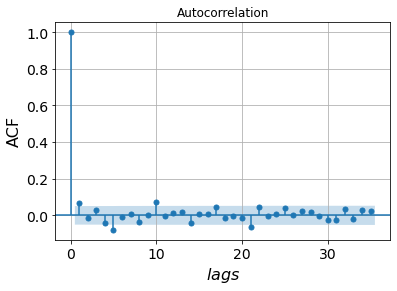

In [10]:
sm.graphics.tsa.plot_acf(d_in,lags=35)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

## 1. Fit a GARCH(1,1) and plot the predicted conditional variance till convergence. Can you obtain the convergence value from the parameter of the regression.

# GARCH faut annualiser

In [11]:
fitted_model = arch_model(d_in*252,vol='GARCH', p=1,q=1).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7503.419054636021
Iteration:      2,   Func. Count:     13,   Neg. LLF: 48872.255813757685
Iteration:      3,   Func. Count:     22,   Neg. LLF: 271629935.63640887
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5185.506650220279
Iteration:      5,   Func. Count:     34,   Neg. LLF: 6184.272769673476
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5177.864419431067
Iteration:      7,   Func. Count:     46,   Neg. LLF: 5177.584119271852
Iteration:      8,   Func. Count:     51,   Neg. LLF: 5177.580963334428
Iteration:      9,   Func. Count:     56,   Neg. LLF: 5177.580935176709
Iteration:     10,   Func. Count:     61,   Neg. LLF: 5177.580933172172
Iteration:     11,   Func. Count:     65,   Neg. LLF: 5177.580933171988
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5177.580933172172
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 

In [12]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5177.58
Distribution:                  Normal   AIC:                           10363.2
Method:            Maximum Likelihood   BIC:                           10384.4
                                        No. Observations:                 1500
Date:                Thu, May 27 2021   Df Residuals:                     1499
Time:                        21:31:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2405      0.180      1.339      0.181 [ -0.112,  0.592]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.1349      0.600      1.890  5.873e-02 [-4.187e-02,  2.312]
alpha[1]       0.0777  2.312e-02      3.362  7.740e-04  [3.242e-02,  0.123]
beta[1]        0.9075  2.727e-02     33.280 7.588e-243    [  0.854,  0.961]
===========================================================================

Covariance estimator: robust
"""

In [13]:
print("aic",fitted_model.aic)
print("bic",fitted_model.bic)

aic 10363.161866344344
bic 10384.414747892706


In [14]:
f = fitted_model.forecast(horizon=lag+1)

d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [15]:
print(f.variance.loc[1499])
print(f.variance.tail(1))## tail(nombre de la ligne en partant de la fin)

h.1    41.970801
h.2    42.486953
h.3    42.995496
h.4    43.496543
h.5    43.990203
h.6    44.476585
Name: 1499, dtype: float64
            h.1        h.2        h.3        h.4        h.5        h.6
1499  41.970801  42.486953  42.995496  43.496543  43.990203  44.476585


h1 --> c'est la prédiction de la dernière valeur du in sample et les autres tes prédictions du horizon -1 jours futurs

In [16]:
print(f.variance.tail(1).values[0])

[41.97080088 42.48695317 42.99549637 43.49654267 43.99020257 44.47658497]


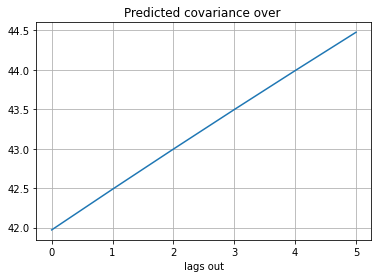

In [17]:
plt.plot(f.variance.tail(1).values[0])
plt.title("Predicted covariance over ")
plt.xlabel("lags out")
plt.grid()

5
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


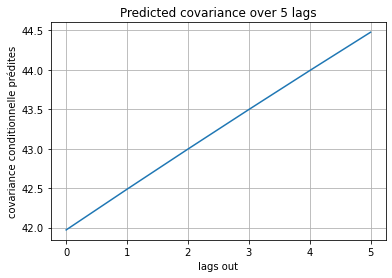

55
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


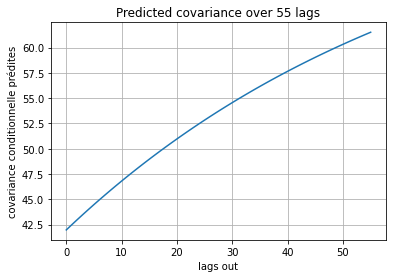

105
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


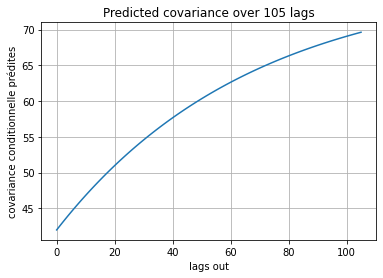

155
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


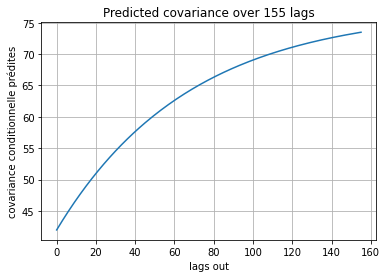

205
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


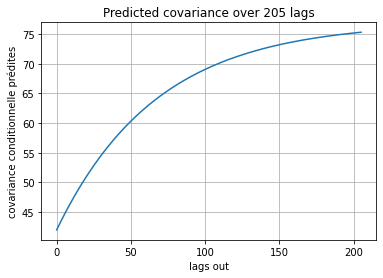

255
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


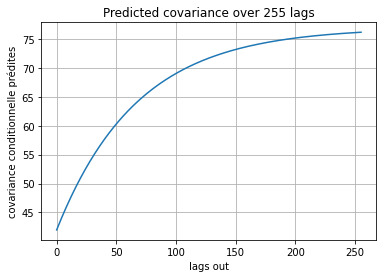

305
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


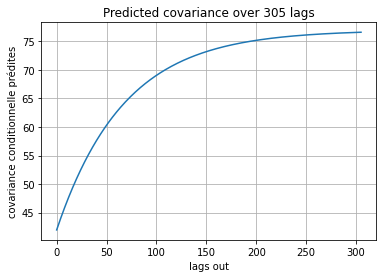

355
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


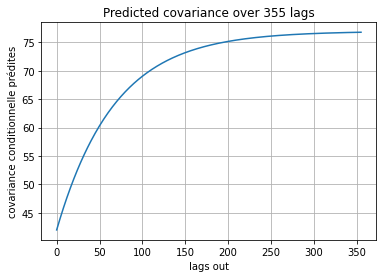

405
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


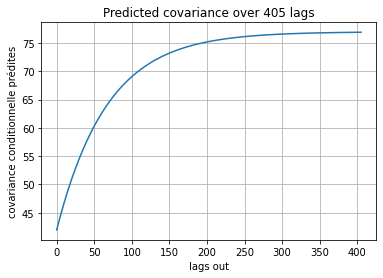

455
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


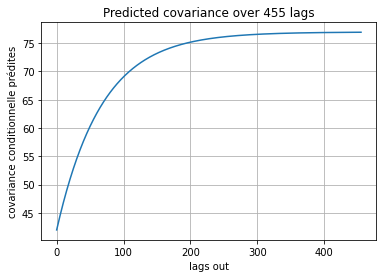

In [18]:
for i in range(5,500,50):
    print(i)
    f = fitted_model.forecast(horizon=i+1)
    plt.plot(f.variance.tail(1).values[0])
    plt.title(f"Predicted covariance over {i} lags")
    plt.xlabel("lags out")
    plt.grid()
    plt.ylabel("covariance conditionnelle prédites")
    plt.show()

In [19]:
print(fitted_model.params)

mu          0.240481
omega       1.134883
alpha[1]    0.077742
beta[1]     0.907516
Name: params, dtype: float64


In [20]:
list_params=fitted_model.params
print("type of list_params",type(list_params))
mu,omega,alpha,beta=list_params.values
print(mu,omega,alpha,beta)

type of list_params <class 'pandas.core.series.Series'>
0.2404808011722794 1.13488307474143 0.0777417182755816 0.9075163474382949


In [ ]:
#Convergence value of the conditional variance
conv = list_params.loc['omega']/(1-list_params.loc['alpha[1]']-list_parms.loc['beta[1]'])

In [21]:
tout=5
nsim=500# nombre de simulation

In [22]:
f = fitted_model.forecast(horizon=tout,simulations=nsim,method='simulation')

d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [23]:
print(f.simulations.variances[-1])## nb de colonnes --> tout et on a nsim ligne résultat des nsim 

[[41.97080088 40.49265795 39.10827885 39.7761789  37.89051681]
 [41.97080088 39.46999523 44.91267163 43.37750024 48.67288137]
 [41.97080088 40.99041417 39.56798147 38.14136939 35.81478114]
 ...
 [41.97080088 40.24862723 38.43707229 40.10411957 43.34275525]
 [41.97080088 52.03116147 53.42393863 50.27517515 52.0448471 ]
 [41.97080088 44.40288252 64.24998025 64.5470994  80.43386176]]


In [24]:
q95=np.percentile(f.simulations.variances[-1][:,1:],95)
q5=np.percentile(f.simulations.variances[-1][:,1:],5)
print("Percentile 5% : ",round(q5,3))
print("Percentile 95% : ",round(q95,3))

Percentile 5% :  35.746
Percentile 95% :  57.356


In [36]:
q95_list=[]
q5_list=[]
nsim=100
for lag in range(5,20,5):
    f = fitted_model.forecast(horizon=lag,simulations=nsim,method='simulation')
    q95_list.append(np.percentile(f.simulations.variances[-1],95,axis=0))
    q5_list.append(np.percentile(f.simulations.variances[-1],5,axis=0))

In [37]:
plt.plot(range(5,20,5),q95_list,color="orange",label="95%")
plt.plot(range(5,20,5),q5_list,color="blue",label="5%")
plt.xlabel("lags")
plt.legend()
plt.grid()

ValueError: setting an array element with a sequence.

In [39]:
t = 0

# define a GARCH(1,1) for in-sample and out-of-sample
Model = arch_model(log_ret[t:t+1500+tout], vol='GARCH', p=1,q=1,dist='t')
# fit only the in-sample time-window 
fit = Model.fit(disp='off',last_obs=1500)

# Simulate for the out-of-sample horizon, if 1000 sims are too much, just reduce it
forecast = fit.forecast(horizon=tout+1,simulations=1000,method='simulation')

d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\univariate\base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001193. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\scipy\optimize\optimize.py:283: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  "minimize step, clipping to bounds", RuntimeWarning)
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set rei

In [42]:
#only the last element are the simulations
forecast.simulations.variances[-1] ## tout colonne et nsim ligne

array([[0.02047942, 0.0090182 , 0.00911223, 0.01138644, 0.04415723,
        0.03039247],
       [0.02047942, 0.06464634, 0.08258998, 0.08811598, 0.01799181,
        0.02274337],
       [0.02047942, 0.06699811, 0.03616403, 0.01948173, 0.009682  ,
        0.0195545 ],
       ...,
       [0.02047942, 0.1731932 , 0.80430391, 2.10187098, 1.72272268,
        5.52710038],
       [0.02047942, 0.00907294, 0.01751354, 0.01156804, 0.01222043,
        0.02163837],
       [0.02047942, 0.01672362, 0.01000885, 0.01152781, 0.01980624,
        0.05695699]])

In [43]:
forecast.simulations.variances[-1].shape

(1000, 6)

In [44]:
simulated = forecast.simulations.variances[-1][:,1:]## toutes les simiulationsjuste les prédictions futures

# Estimat the conditional variance by using the in-sample calibrated parameters
OOS_obs = Model.fix(fit.params).conditional_volatility[-tout:]**2
## fix computing overall the timeseries 

# Get a 90% confidence interval
minCI,maxCI = np.percentile(simulated,5,axis=0),np.percentile(simulated,95,axis=0)

# Get the mean (it can be computed also analytically)
mean = simulated.mean(axis=0)

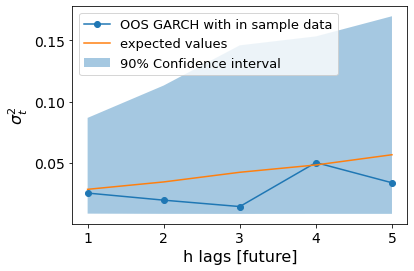

In [46]:
dx = np.arange(1,tout+1)
plt.plot(dx,OOS_obs,'-o',label='OOS GARCH with in sample data')
plt.fill_between(dx,minCI,maxCI,alpha=0.4,label='90% Confidence interval')
plt.plot(dx,mean,label='expected values')
plt.xlabel('h lags [future]',fontsize=16)
plt.ylabel(r'$σ_t^2$',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(loc='upper left',fontsize=13)

In [50]:
Coverage_GARCH,DIFF_GARCH = [],[]

# Sliding windows in step of 5 days
for t in range(0,1000,5):## on partait de t= et là on déplace le point de départ 

    Model = arch_model(log_ret[t:t+1500+tout], vol='GARCH', p=1,q=1,dist='t')
    fit = Model.fit(disp='off',last_obs=1500)
    
    #if 1000 are too much reduce it
    forecast = fit.forecast(horizon=tout+1,simulations=1000,method='simulation')

    simulated = forecast.simulations.variances[-1][:,1:]
    
    OOS_obs = Model.fix(fit.params).conditional_volatility[-tout:]**2


    minCI,maxCI = np.percentile(simulated,5,axis=0),np.percentile(simulated,95,axis=0)
    mean = simulated.mean(axis=0)

    # Computing if the observations fall inside the CI
    Coverage_GARCH.append( (OOS_obs>minCI)*(OOS_obs<maxCI) )## append que s'il est dans l'intervalle de confiance 
    
    # Computing the deviation from the expectation 
    DIFF_GARCH.append(OOS_obs-mean)

warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\arch\univariate\base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001157. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescali

In [ ]:
dx = np.arange(1,1+tout)
plt.plot(dx, np.mean(Coverage_GARCH,axis=0),'-o' )
plt.hlines(0.9,0,7,linestyles='--')
plt.xlim([0.8,5.2])
plt.xlabel('h lags [future]',fontsize=16)
plt.ylabel('Fraction of True Positive',fontsize=16)
plt.tick_params(labelsize=14)

plt.title('Expected Coverage 90%',fontsize=16)
plt.show()

In [ ]:
 # on voit que quand on projette sur  jours plus de 90 %des simulations de Monte Carlo sont dasn l'intervalles de confiance alors que pour h lags inférieur à 5 c'est pas le cas